# Problem Statement:
##### Objective:
To determine whether a Test Campaign leads to a significantly higher number of purchases compared to a Control Campaign using A/B testing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data loading and Cleaning

In [2]:
# Read dataset
control_group = pd.read_csv('control_group.csv',delimiter=";")
test_group = pd.read_csv('test_group.csv',delimiter=";")

In [3]:
# Merge data to single dataframe
fulldf = pd.concat([control_group,test_group],axis=0)

In [4]:
fulldf.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.2+ KB


In [6]:
# Having Nan value data
fulldf[fulldf.isnull().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop Nan value
fulldf.dropna(axis=0,inplace=True)

In [8]:
fulldf['Campaign Name'].value_counts()

Campaign Name
Test Campaign       30
Control Campaign    29
Name: count, dtype: int64

In [9]:
# Summary Statistics
fulldf.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2435.762712,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
std,376.358795,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2113.500000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,2421.000000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,2743.000000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


## EDA

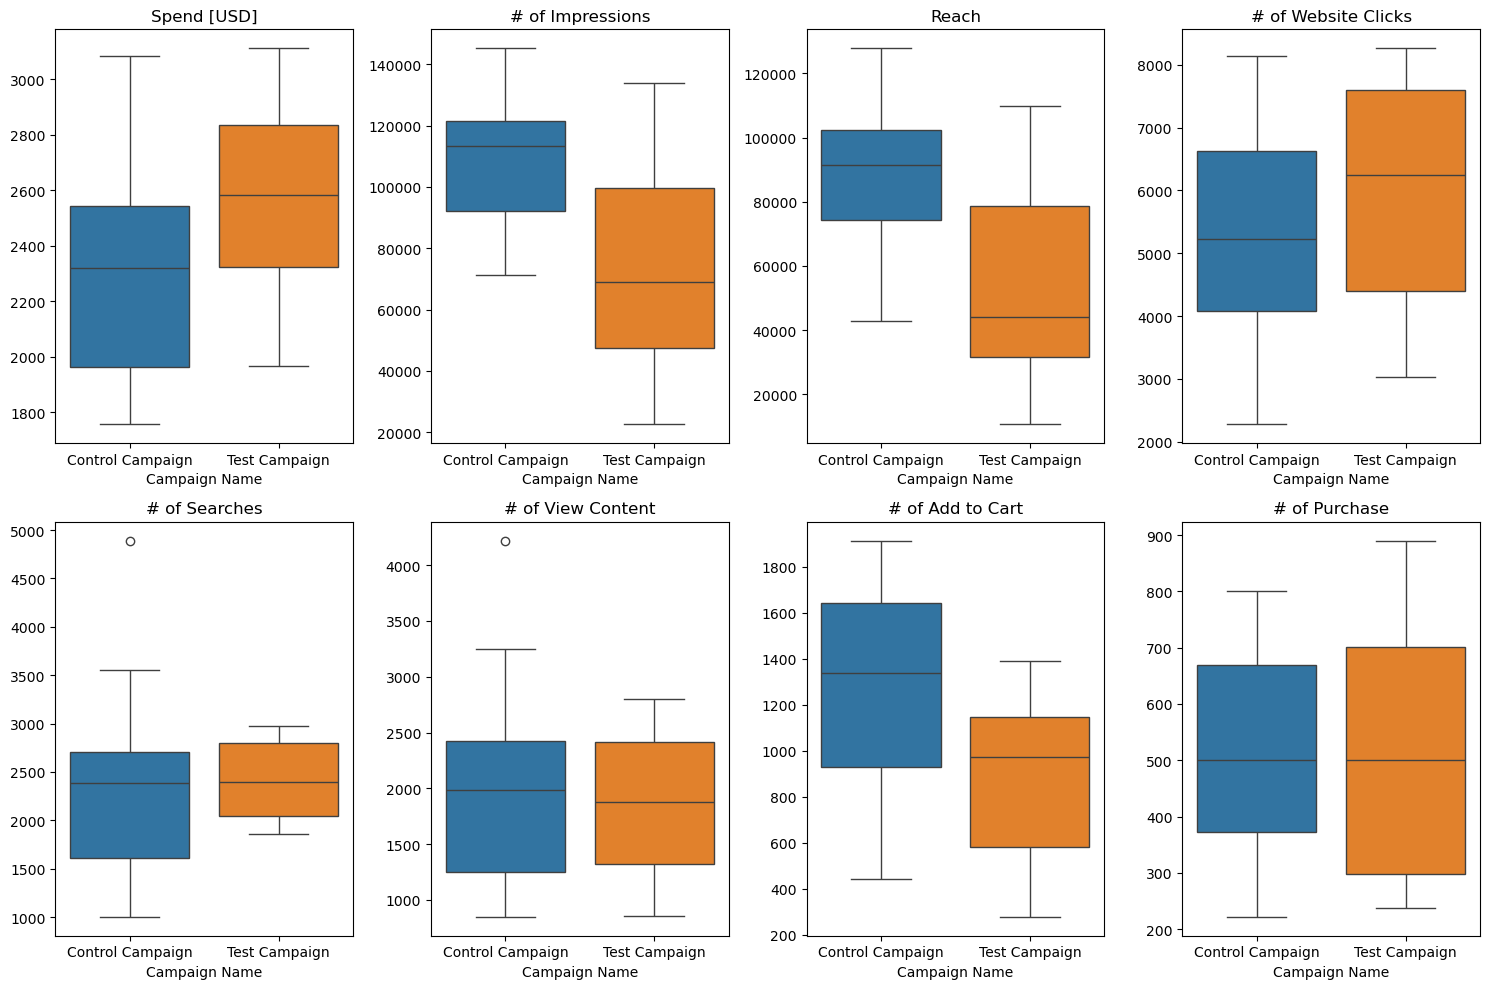

In [10]:
# Box Plot for All Metrics
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()

numeric_cols = fulldf.select_dtypes(include=["int","float"]).columns.to_list()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=fulldf, x="Campaign Name", y=col, ax=axes[i],hue="Campaign Name")
    axes[i].set_title(col)
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

Purchase cloumn no outlier Present

# Normality Test

In [11]:
control_group = fulldf[fulldf['Campaign Name'] == 'Control Campaign']['# of Purchase']
test_group = fulldf[fulldf['Campaign Name'] == 'Test Campaign']['# of Purchase']

### Null Hypothesis (H₀):
H₀: The data is normally distributed.

### Alternative Hypothesis (H₁):
H₁: The data is not normally distributed

In [12]:
control_normality = stats.shapiro(control_group)
test_normality = stats.shapiro(test_group)

print("Control Group Normality Test:", control_normality)
print("Test Group Normality Test:", test_normality)

Control Group Normality Test: ShapiroResult(statistic=0.938141969247496, pvalue=0.08964421284477989)
Test Group Normality Test: ShapiroResult(statistic=0.9181893816994644, pvalue=0.02407767129664654)


Since the Control Group p-value (0.089) > 0.05, fail to reject the null hypothesis, meaning the data can be considered normally distributed.<br>
and the Test Group p-value (0.024) < 0.05, reject the null hypothesis, meaning the data can be considered not normally distributed.<br>
#### Perform the Mann-Whitney U test since the Test Group is not normally distributed

#  Mann-Whitney U test (also known as the Wilcoxon rank-sum test - Non-parametric test

### Null Hypothesis (H0):
There is no significant difference in the number of purchases between the Control and Test groups. Any observed difference is due to random chance.
### Alternative Hypothesis (H1):
There is a significant difference in the number of purchases between the Control and Test groups. The observed difference is not due to random chance.

In [13]:
u_stat, p_value = stats.mannwhitneyu(control_group, test_group)
print("Mann-Whitney U Test Result:", u_stat, p_value)

# Step 3: Interpret the results
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the number of purchases.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the number of purchases.")

Mann-Whitney U Test Result: 439.0 0.957674926453464
We fail to reject the null hypothesis. There is no significant difference in the number of purchases.


##### Outcome:
Based on the results of the Mann-Whitney U test, with a test statistic of 439.0 and a p-value of 0.9577, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the number of purchases between the Control Group and the Test Group. Therefore, we conclude that the change implemented in the Test Group did not result in a measurable improvement in purchases when compared to the Control Group.